In [17]:
import cv2 as cv
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models

### training information

In [18]:
labels = ["buildings", "forest"]
training_images = np.zeros(shape=(5373, 32,32,3))
training_labels = np.zeros(shape=(5373,1))
idx = 0
class_label = 0
for label in labels:
    curr_dir = os.path.join(os.path.sep,'training',label)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for image in all_imgs:
        im = cv.imread(f'training/{label}/{image}')
        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        im = cv.resize(im, dsize=(32,32))
        training_images[idx,:] = np.array(im)
        training_labels[idx] = class_label
        idx = idx + 1
    class_label = class_label + 1

In [19]:
training_images.shape

(5373, 32, 32, 3)

In [20]:
training_images[0].shape

(32, 32, 3)

### validation information

In [21]:
labels = ["buildings", "forest"]
valid_images = np.zeros(shape=(551, 32,32,3))
valid_labels = np.zeros(shape=(551,1))
idx = 0
class_label = 0
for label in labels:
    curr_dir = os.path.join(os.path.sep,'validation',label)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for image in all_imgs:
        im = cv.imread(f'validation/{label}/{image}')
        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        im = cv.resize(im, dsize=(32,32))
        valid_images[idx,:] = np.array(im)
        valid_labels[idx] = class_label
        idx = idx + 1
    class_label = class_label + 1

### testing information

In [22]:
labels = ["buildings", "forest"]
testing_images = np.zeros(shape=(480, 32,32,3))
testing_labels = np.zeros(shape=(480,1))
idx = 0
class_label = 0
for label in labels:
    curr_dir = os.path.join(os.path.sep,'testing',label)
    all_imgs = os.listdir(os.getcwd()+curr_dir)
    for image in all_imgs:
        im = cv.imread(f'testing/{label}/{image}')
        im = cv.cvtColor(im, cv.COLOR_BGR2RGB)
        im = cv.resize(im, dsize=(32,32))
        testing_images[idx,:] = np.array(im)
        testing_labels[idx] = class_label
        idx = idx + 1
    class_label = class_label + 1

In [23]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers. Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers. Conv2D(64, (3, 3), activation='relu'))
model.add(layers. Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))


In [24]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [25]:
hist = model.fit(training_images, training_labels, epochs=10, validation_data=(valid_images, valid_labels))

Epoch 1/10
168/168 [==============================] - 4s 19ms/step - loss: 0.9531 - accuracy: 0.8046 - val_loss: 0.2735 - val_accuracy: 0.8984
Epoch 2/10
168/168 [==============================] - 3s 19ms/step - loss: 0.2371 - accuracy: 0.9055 - val_loss: 0.2319 - val_accuracy: 0.8911
Epoch 3/10
168/168 [==============================] - 3s 21ms/step - loss: 0.1861 - accuracy: 0.9241 - val_loss: 0.1837 - val_accuracy: 0.9347
Epoch 4/10
168/168 [==============================] - 3s 19ms/step - loss: 0.1539 - accuracy: 0.9425 - val_loss: 0.1448 - val_accuracy: 0.9401
Epoch 5/10
168/168 [==============================] - 3s 19ms/step - loss: 0.1371 - accuracy: 0.9453 - val_loss: 0.1185 - val_accuracy: 0.9546
Epoch 6/10
168/168 [==============================] - 4s 23ms/step - loss: 0.1225 - accuracy: 0.9535 - val_loss: 0.0947 - val_accuracy: 0.9673
Epoch 7/10
168/168 [==============================] - 4s 22ms/step - loss: 0.1191 - accuracy: 0.9559 - val_loss: 0.0999 - val_accuracy: 0.9546

In [26]:
loss, accuracy = model.evaluate(testing_images, testing_labels)
print('Loss =', round(loss,3))
print(f'Accuracy = {round(accuracy*100,2)} %')

15/15 [==============================] - 0s 6ms/step - loss: 0.0201 - accuracy: 0.9979
Loss = 0.02
Accuracy = 99.79 %


### visualization

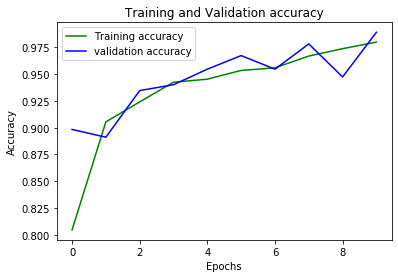

In [27]:
loss_train = hist.history['accuracy']
loss_val = hist.history['val_accuracy']
plt.plot(loss_train, 'g', label='Training accuracy')
plt.plot(loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

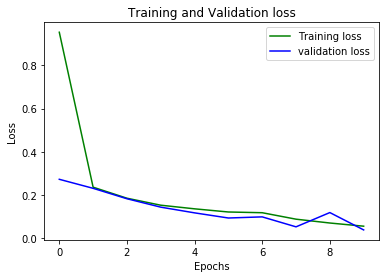

In [28]:
loss_train = hist.history['loss']
loss_val = hist.history['val_loss']
plt.plot(loss_train, 'g', label='Training loss')
plt.plot(loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x13801a6ae88>)

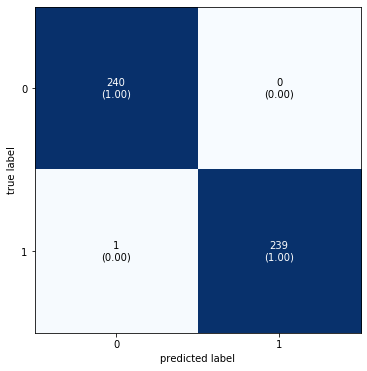

In [29]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
pred = model.predict(testing_images) # pred will be in shape 480 * 2
# use this prediction to store the finaly prediction
prediction = np.zeros(shape=(480,1))
i = 0
# this loop for finaly predict
"""
for example
pred[0] = [0.9 0.1]
so will make it as
pred[0] = [0] that's mean prediction label is 0
"""
for predict in pred:
    high_prop = predict.max()
    # get index of high prop
    result = np.where(predict == high_prop)
    # store result in prediction
    prediction[i] = result
    i = i + 1

cm = confusion_matrix(testing_labels,prediction)
# plot confusion matrix
plot_confusion_matrix(conf_mat = cm,figsize=(6,6),
                     show_normed = True)

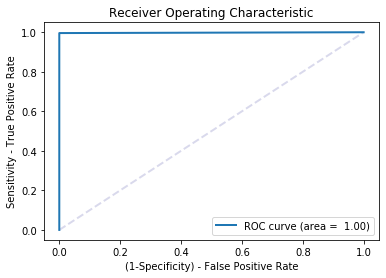

In [30]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(testing_labels, prediction)
roc_auc = metrics.auc(fpr, tpr)

lw = 2
plt.figure()
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', alpha=0.15)
plt.plot(fpr, tpr, lw=lw, label=f'ROC curve (area = {roc_auc: 0.2f})')

plt.xlabel('(1-Specificity) - False Positive Rate')
plt.ylabel('Sensitivity - True Positive Rate')
plt.title(f'Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()